In [580]:
from glob import glob
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import anndata
import pickle
import matplotlib.pyplot as plt

from tqdm import tqdm
import gc
import tarfile
import scanorama
import tqdm

# Q1

In [588]:
adata = sc.read_10x_mtx("C:/Users/xumin/Documents/CU/BMEN4480 stat ml for genomics/assignent1/filtered_gene_bc_matrices/GRCh38",
                       var_names='gene_symbols',cache=True)

In [589]:
adata

AnnData object with n_obs × n_vars = 4340 × 33694
    var: 'gene_ids'

In [590]:
adata.var_names_make_unique()

In [591]:
adata

AnnData object with n_obs × n_vars = 4340 × 33694
    var: 'gene_ids'

In [592]:
df = adata.to_df()

In [593]:
df

RP11-34P13.3  FAM138A  OR4F5  RP11-34P13.7  RP11-34P13.8  \
AAACCTGAGAAGGCCT-1           0.0      0.0    0.0           0.0           0.0   
AAACCTGAGACAGACC-1           0.0      0.0    0.0           0.0           0.0   
AAACCTGAGATAGTCA-1           0.0      0.0    0.0           0.0           0.0   
AAACCTGAGCGCCTCA-1           0.0      0.0    0.0           0.0           0.0   
AAACCTGAGGCATGGT-1           0.0      0.0    0.0           0.0           0.0   
...                          ...      ...    ...           ...           ...   
TTTGGTTTCGCTAGCG-1           0.0      0.0    0.0           0.0           0.0   
TTTGTCACACTTAACG-1           0.0      0.0    0.0           0.0           0.0   
TTTGTCACAGGTCCAC-1           0.0      0.0    0.0           0.0           0.0   
TTTGTCAGTTAAGACA-1           0.0      0.0    0.0           0.0           0.0   
TTTGTCATCCCAAGAT-1           0.0      0.0    0.0           0.0           0.0   

                    RP11-34P13.14  RP11-34P13.9  FO538757.3  FO538757.2  \
AAACCTGAGAAGGCCT-1            0.0           0.0         0.0         0.0   
AAACCTGAGACAGACC-1            0.0           0.0         0.0         0.0   
AAACCTGAGATAGTCA-1            0.0           0.0         0.0         0.0   
AAACCTGAGCGCCTCA-1            0.0           0.0         0.0         0.0   
AAACCTGAGGCATGGT-1            0.0           0.0         0.0         0.0   
...                           ...           ...         ...         ...   
TTTGGTTTCGCTAGCG-1            0.0           0.0         0.0         0.0   
TTTGTCACACTTAACG-1            0.0           0.0         0.0         1.0   
TTTGTCACAGGTCCAC-1            0.0           0.0         0.0         0.0   
TTTGTCAGTTAAGACA-1            0.0           0.0         0.0         0.0   
TTTGTCATCCCAAGAT-1            0.0           0.0         0.0         0.0   

                    AP006222.2  ...  AC007325.2  BX072566.1  AL354822.1  \
AAACCTGAGAAGGCCT-1         0.0  ...         0.0         0.0         0.0   
AAACCTGAGACAGACC-1         0.0  ...         0.0         0.0         0.0   
AAACCTGAGATAGTCA-1         0.0  ...         0.0         0.0         0.0   
AAACCTGAGCGCCTCA-1         0.0  ...         0.0         0.0         0.0   
AAACCTGAGGCATGGT-1         0.0  ...         0.0         0.0         0.0   
...                        ...  ...         ...         ...         ...   
TTTGGTTTCGCTAGCG-1         0.0  ...         0.0         0.0         0.0   
TTTGTCACACTTAACG-1         0.0  ...         0.0         0.0         0.0   
TTTGTCACAGGTCCAC-1         0.0  ...         0.0         0.0         1.0   
TTTGTCAGTTAAGACA-1         0.0  ...         0.0         0.0         0.0   
TTTGTCATCCCAAGAT-1         0.0  ...         0.0         0.0         0.0   

                    AC023491.2  AC004556.1  AC233755.2  AC233755.1  \
AAACCTGAGAAGGCCT-1         0.0         0.0         0.0         0.0   
AAACCTGAGACAGACC-1         0.0         0.0         0.0         0.0   
AAACCTGAGATAGTCA-1         0.0         0.0         0.0         0.0   
AAACCTGAGCGCCTCA-1         0.0         0.0         0.0         0.0   
AAACCTGAGGCATGGT-1         0.0         0.0         0.0         0.0   
...                        ...         ...         ...         ...   
TTTGGTTTCGCTAGCG-1         0.0         1.0         0.0         0.0   
TTTGTCACACTTAACG-1         0.0         0.0         0.0         0.0   
TTTGTCACAGGTCCAC-1         0.0         0.0         0.0         0.0   
TTTGTCAGTTAAGACA-1         0.0         0.0         0.0         0.0   
TTTGTCATCCCAAGAT-1         0.0         0.0         0.0         0.0   

                    AC240274.1  AC213203.1  FAM231B  
AAACCTGAGAAGGCCT-1         0.0         0.0      0.0  
AAACCTGAGACAGACC-1         0.0         0.0      0.0  
AAACCTGAGATAGTCA-1         0.0         0.0      0.0  
AAACCTGAGCGCCTCA-1         0.0         0.0      0.0  
AAACCTGAGGCATGGT-1         0.0         0.0      0.0  
...                        ...         ...      ...  
TTTGGTTTCGCTAGCG-1         0.0        

In [169]:
gene =[]
cell=[]
count = []

In [170]:
# construct a dense matrix
for i in df.columns:
    for j in range(df[i].shape[0]):
        if df[i][j]==0:
            continue
        else:
            gene.append(i)
            cell.append(j)
            count.append(df[i][j])

In [176]:
densedf = pd.DataFrame({"gene" :gene, "cell":cell,"count":count})

In [177]:
densedf

gene  cell  count
0        RP11-34P13.7   230    1.0
1        RP11-34P13.7   762    1.0
2        RP11-34P13.7   772    1.0
3        RP11-34P13.7  1229    1.0
4        RP11-34P13.7  2641    1.0
...               ...   ...    ...
5727690    AC240274.1  3747    1.0
5727691    AC240274.1  4013    1.0
5727692    AC240274.1  4092    1.0
5727693    AC240274.1  4106    1.0
5727694    AC240274.1  4126    1.0

[5727695 rows x 3 columns]

Q1a:

sparse matrix: 4340 cells; 33694 genes

dense matrix: 5727695 cells and genes 

In [51]:
library =[]

In [52]:
for row in df.iterrows():
    library.append(sum(row[-1]))

In [53]:
loglibrary = np.log10(library)

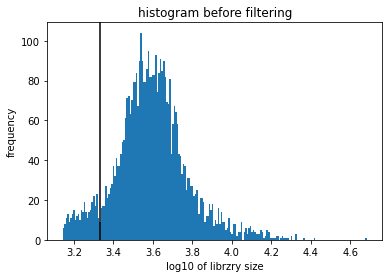

In [497]:
#histogram before filtering
plt.hist(loglibrary, bins = 200)
plt.ylabel('frequency')
plt.xlabel('log10 of librzry size')
plt.axvline(x = 3.33, color = 'black', label = 'axvline - full height')
plt.title("histogram before filtering")
plt.show()

In [73]:
min(loglibrary)

3.141763230275788

In [74]:
max(loglibrary)

4.685231030488812

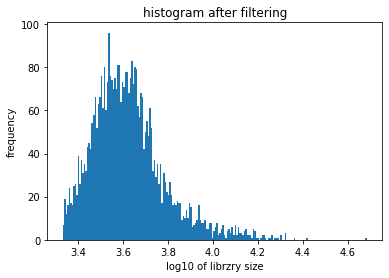

In [498]:
#histogram after filtering, threshold setting as 3.33
plt.hist(loglibrary[loglibrary>3.33], bins = 200)
plt.ylabel('frequency')
plt.xlabel('log10 of librzry size')
plt.title("histogram after filtering")
plt.show()

In [496]:
np.median(loglibrary[loglibrary>3.33])

3.6033067931650136

In [501]:
#the median of library size across all cells after filtering
10**np.median(loglibrary[loglibrary>3.33])

4011.499968839585

Q1b:

The library size fits a log normal distribution.

I think this data require filtering. The filtered data are probably empty droplets.

The median of library size across all cells after filtering: 4011.5

In [100]:
celleachgene = []

In [101]:
for column in df.columns:
    celleachgene.append(sum(df[column]))

In [109]:
list = []

In [110]:
for i in celleachgene:
    if i!=0:
        list.append(i)

In [112]:
logcelleachgene = np.log10(list)

In [113]:
logcelleachgene

array([0.95424251, 0.30103   , 0.        , ..., 1.        , 1.17609126,
       1.60205999])

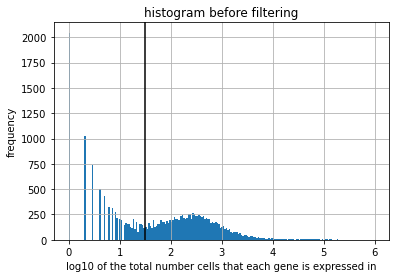

In [507]:
plt.hist(logcelleachgene, bins = 200)
plt.grid()
plt.xlabel("log10 of the total number cells that each gene is expressed in")
plt.ylabel("frequency")
plt.title("histogram before filtering")
plt.axvline(x = 1.5, color = 'black', label = 'axvline - full height')
plt.show()


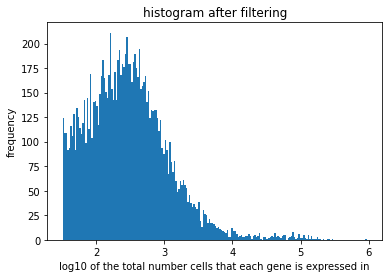

In [509]:
plt.hist(logcelleachgene[logcelleachgene>1.5], bins = 200)
plt.xlabel("log10 of the total number cells that each gene is expressed in")
plt.ylabel("frequency")
plt.title("histogram after filtering")
plt.show()

In [511]:
logcelleachgene[logcelleachgene>1.5].shape

(11504,)

Q1c

This distribution of total number cells that each gene is expressed in is multimodal. 

After filter out the lower mode as noisy genes, we get 11504 genes.

# Q2

Q2a

In [594]:
normdf = df

In [596]:
sumedpercell = np.sum(df,axis =1)
median = np.median(sumedpercell)

In [597]:
 for idx in tqdm.tqdm(range(df.shape[0])):
    if sumedpercell[idx] != 0:
        normdf.loc[df.index[idx]] = (df.iloc[idx,:] / sumedpercell[idx])*median

100%|████████████████████████████████████████████████████████████████████████████| 4340/4340 [00:01<00:00, 2691.10it/s]


In [598]:
normdf

RP11-34P13.3  FAM138A  OR4F5  RP11-34P13.7  RP11-34P13.8  \
AAACCTGAGAAGGCCT-1           0.0      0.0    0.0           0.0           0.0   
AAACCTGAGACAGACC-1           0.0      0.0    0.0           0.0           0.0   
AAACCTGAGATAGTCA-1           0.0      0.0    0.0           0.0           0.0   
AAACCTGAGCGCCTCA-1           0.0      0.0    0.0           0.0           0.0   
AAACCTGAGGCATGGT-1           0.0      0.0    0.0           0.0           0.0   
...                          ...      ...    ...           ...           ...   
TTTGGTTTCGCTAGCG-1           0.0      0.0    0.0           0.0           0.0   
TTTGTCACACTTAACG-1           0.0      0.0    0.0           0.0           0.0   
TTTGTCACAGGTCCAC-1           0.0      0.0    0.0           0.0           0.0   
TTTGTCAGTTAAGACA-1           0.0      0.0    0.0           0.0           0.0   
TTTGTCATCCCAAGAT-1           0.0      0.0    0.0           0.0           0.0   

                    RP11-34P13.14  RP11-34P13.9  FO538757.3  FO538757.2  \
AAACCTGAGAAGGCCT-1            0.0           0.0         0.0    0.000000   
AAACCTGAGACAGACC-1            0.0           0.0         0.0    0.000000   
AAACCTGAGATAGTCA-1            0.0           0.0         0.0    0.000000   
AAACCTGAGCGCCTCA-1            0.0           0.0         0.0    0.000000   
AAACCTGAGGCATGGT-1            0.0           0.0         0.0    0.000000   
...                           ...           ...         ...         ...   
TTTGGTTTCGCTAGCG-1            0.0           0.0         0.0    0.000000   
TTTGTCACACTTAACG-1            0.0           0.0         0.0    1.174157   
TTTGTCACAGGTCCAC-1            0.0           0.0         0.0    0.000000   
TTTGTCAGTTAAGACA-1            0.0           0.0         0.0    0.000000   
TTTGTCATCCCAAGAT-1            0.0           0.0         0.0    0.000000   

                    AP006222.2  ...  AC007325.2  BX072566.1  AL354822.1  \
AAACCTGAGAAGGCCT-1         0.0  ...         0.0         0.0    0.000000   
AAACCTGAGACAGACC-1         0.0  ...         0.0         0.0    0.000000   
AAACCTGAGATAGTCA-1         0.0  ...         0.0         0.0    0.000000   
AAACCTGAGCGCCTCA-1         0.0  ...         0.0         0.0    0.000000   
AAACCTGAGGCATGGT-1         0.0  ...         0.0         0.0    0.000000   
...                        ...  ...         ...         ...         ...   
TTTGGTTTCGCTAGCG-1         0.0  ...         0.0         0.0    0.000000   
TTTGTCACACTTAACG-1         0.0  ...         0.0         0.0    0.000000   
TTTGTCACAGGTCCAC-1         0.0  ...         0.0         0.0    0.464612   
TTTGTCAGTTAAGACA-1         0.0  ...         0.0         0.0    0.000000   
TTTGTCATCCCAAGAT-1         0.0  ...         0.0         0.0    0.000000   

                    AC023491.2  AC004556.1  AC233755.2  AC233755.1  \
AAACCTGAGAAGGCCT-1         0.0    0.000000         0.0         0.0   
AAACCTGAGACAGACC-1         0.0    0.000000         0.0         0.0   
AAACCTGAGATAGTCA-1         0.0    0.000000         0.0         0.0   
AAACCTGAGCGCCTCA-1         0.0    0.000000         0.0         0.0   
AAACCTGAGGCATGGT-1         0.0    0.000000         0.0         0.0   
...                        ...         ...         ...         ...   
TTTGGTTTCGCTAGCG-1         0.0    0.593568         0.0         0.0   
TTTGTCACACTTAACG-1         0.0    0.000000         0.0         0.0   
TTTGTCACAGGTCCAC-1         0.0    0.000000         0.0         0.0   
TTTGTCAGTTAAGACA-1         0.0    0.000000         0.0         0.0   
TTTGTCATCCCAAGAT-1         0.0    0.000000         0.0         0.0   

                    AC240274.1  AC213203.1  FAM231B  
AAACCTGAGAAGGCCT-1         0.0         0.0      0.0  
AAACCTGAGACAGACC-1         0.0         0.0      0.0  
AAACCTGAGATAGTCA-1         0.0         0.0      0.0  
AAACCTGAGCGCCTCA-1         0.0         0.0      0.0  
AAACCTGAGGCATGGT-1         0.0         0.0      0.0  
...                        ...         ...      ...  
TTTGGTTTCGCTAGCG-1         0.0        

In [582]:
count = []
with tqdm(total = densedf.shape[0])as bar:
    for index in range(densedf.shape[0]):
        line = densedf.loc[index]
        bar.update(1)
        count.append(normdf.iloc[line.cell,:][line.gene])

In [403]:
densedf["normed"] = count

In [512]:
densedf

gene  cell  count    normed
0        RP11-34P13.7   230    1.0  0.871226
1        RP11-34P13.7   762    1.0  0.490797
2        RP11-34P13.7   772    1.0  0.605086
3        RP11-34P13.7  1229    1.0  1.102824
4        RP11-34P13.7  2641    1.0  0.852027
...               ...   ...    ...       ...
5727690    AC240274.1  3747    1.0  0.765492
5727691    AC240274.1  4013    1.0  0.397338
5727692    AC240274.1  4092    1.0  0.577262
5727693    AC240274.1  4106    1.0  1.303608
5727694    AC240274.1  4126    1.0  0.540467

[5727695 rows x 4 columns]

In [564]:
adata.X = normdf

Q2b

In [419]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


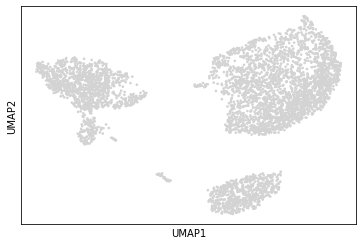

In [514]:
sc.pl.umap(adata)

In [421]:
embedding=adata.obsm["X_umap"]

In [422]:
embedding

array([[-1.2280383,  9.025806 ],
       [-1.4618212,  9.76282  ],
       [-2.5328228, 12.271181 ],
       ...,
       [12.318418 ,  9.448629 ],
       [10.540411 , -1.7643467],
       [-0.6354605,  9.336146 ]], dtype=float32)

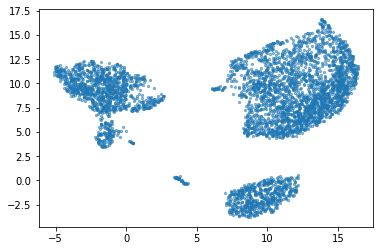

In [424]:
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, alpha=0.5)

In [425]:
sc.pp.scale(adata)
sc.tl.pca(adata)

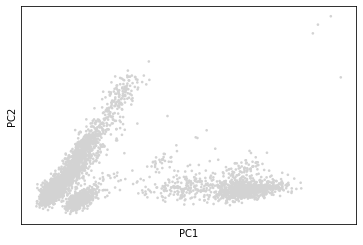

In [426]:
sc.pl.pca(adata)

Q2b

There are three clusters in the umap.

There are also three clusters in the pca plot.

The umap dimensionality reduction method may probably look for a low-dimensional projection of the data with the most comparable topological structure. 

Q2c

In [600]:
adata.obs["log10librarysize"] = loglibrary

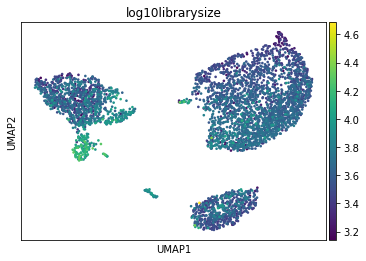

In [431]:
sc.pl.umap(adata, color = "log10librarysize")

Q2c

As shown in this plot, we can see the distribution of log10 library size. It has the largest library size on the islands below the leftmost cluster. The rest of all area has very similar library sizes.

Q2d

In [441]:
markers = pd.read_excel('C:/Users/xumin/Documents/Azizi_Lab/batch_correction/Major_cell_type_markers.xlsx')
markers.head()

Myeloid       NK Macrophage Monocyte B Cells T cells Endothelial Fibroblast  \
0    CD14    NCAM1       CD68     CD33    CD19    CD3D      PECAM1        VIM   
1    CD68     GNLY       MRC1      LYZ  CD40LG    CD3E         NaN      ACTA2   
2    APOE     NCR1       MSR1      MPO    IGHD     NaN         NaN   SERPINH1   
3    CD81  KIR2DL4       NRP1     FCN1    EBF1     NaN         NaN     S100A4   
4     CD9  KIR2DL3       CD82    CSF3R    TCF3     NaN         NaN        NaN   

  Neutrophil         Mast Cell  \
0      CD11B            CD11b-   
1   CD14 low        CD11c-/low   
2       CD15             CD33-   
3       CD16             CD45+   
4       CD32  CD117/c-kit high   

  Granulocytic/PMN Myeloid-derived Suppressor Cells                Eosinophil  \
0                                            CD11b+                     CCR3+   
1                                             CD14-  CD11b/ Integrin alpha M+   
2                                             CD15+                 CD14-/low   
3                                             CD33+                     CD15+   
4                                   CD66b/CEACAM-8+                     CD16-   

     DC  
0  CD80  
1  CD86  
2  CCR7  
3  CD1a  
4  CD1c

In [459]:
Cell_type_interest = ["Myeloid","NK","Macrophage","Monocyte","B Cells","T cells","Endothelial","Fibroblast","Neutrophil","DC"]
markers_df = markers[Cell_type_interest]
markers_df.head()

Myeloid       NK Macrophage Monocyte B Cells T cells Endothelial Fibroblast  \
0    CD14    NCAM1       CD68     CD33    CD19    CD3D      PECAM1        VIM   
1    CD68     GNLY       MRC1      LYZ  CD40LG    CD3E         NaN      ACTA2   
2    APOE     NCR1       MSR1      MPO    IGHD     NaN         NaN   SERPINH1   
3    CD81  KIR2DL4       NRP1     FCN1    EBF1     NaN         NaN     S100A4   
4     CD9  KIR2DL3       CD82    CSF3R    TCF3     NaN         NaN        NaN   

  Neutrophil    DC  
0      CD11B  CD80  
1   CD14 low  CD86  
2       CD15  CCR7  
3       CD16  CD1a  
4       CD32  CD1c

Myeloid
['CD14' 'CD68' 'APOE' 'CD81' 'CD9' 'CD163' 'CD1C' 'FKT3' 'CD33']
Genes that are in the adata
['APOE' 'CD14' 'CD163' 'CD1C' 'CD33' 'CD68' 'CD81' 'CD9']
Myeloid


C:\Users\xumin\AppData\Local\Temp\ipykernel_5980\2433002912.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if real_genes ==[]:


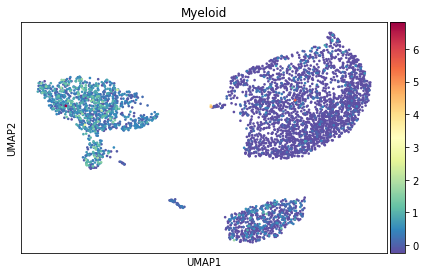

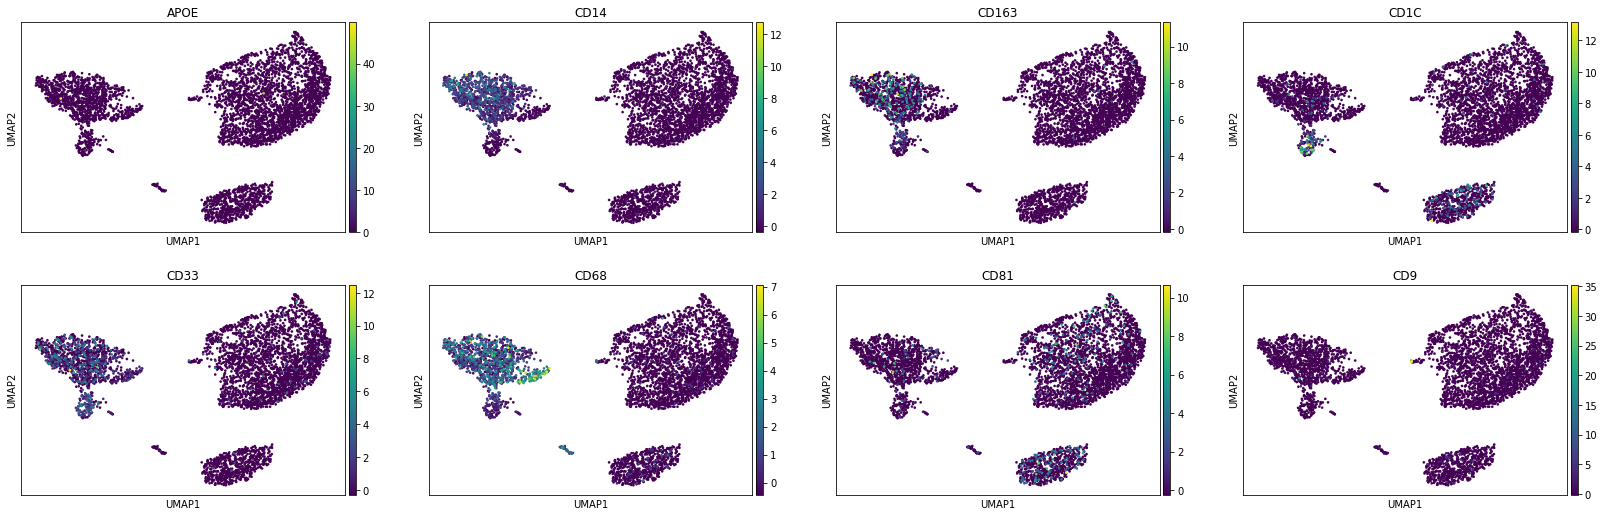

NK
['NCAM1' 'GNLY' 'NCR1' 'KIR2DL4' 'KIR2DL3' 'KIR3DL2' 'KIR2DL1' 'KIR3DL1'
 'KIR3DX1' 'KIR3DL2']
Genes that are in the adata
['GNLY' 'KIR2DL1' 'KIR2DL3' 'KIR2DL4' 'KIR3DL1' 'KIR3DL2' 'KIR3DX1'
 'NCAM1' 'NCR1']
NK


C:\Users\xumin\AppData\Local\Temp\ipykernel_5980\2433002912.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if real_genes ==[]:


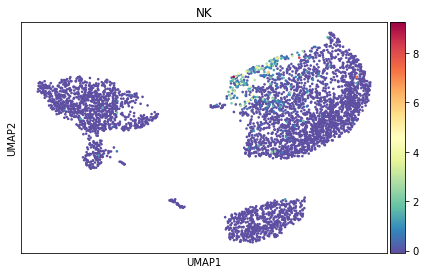

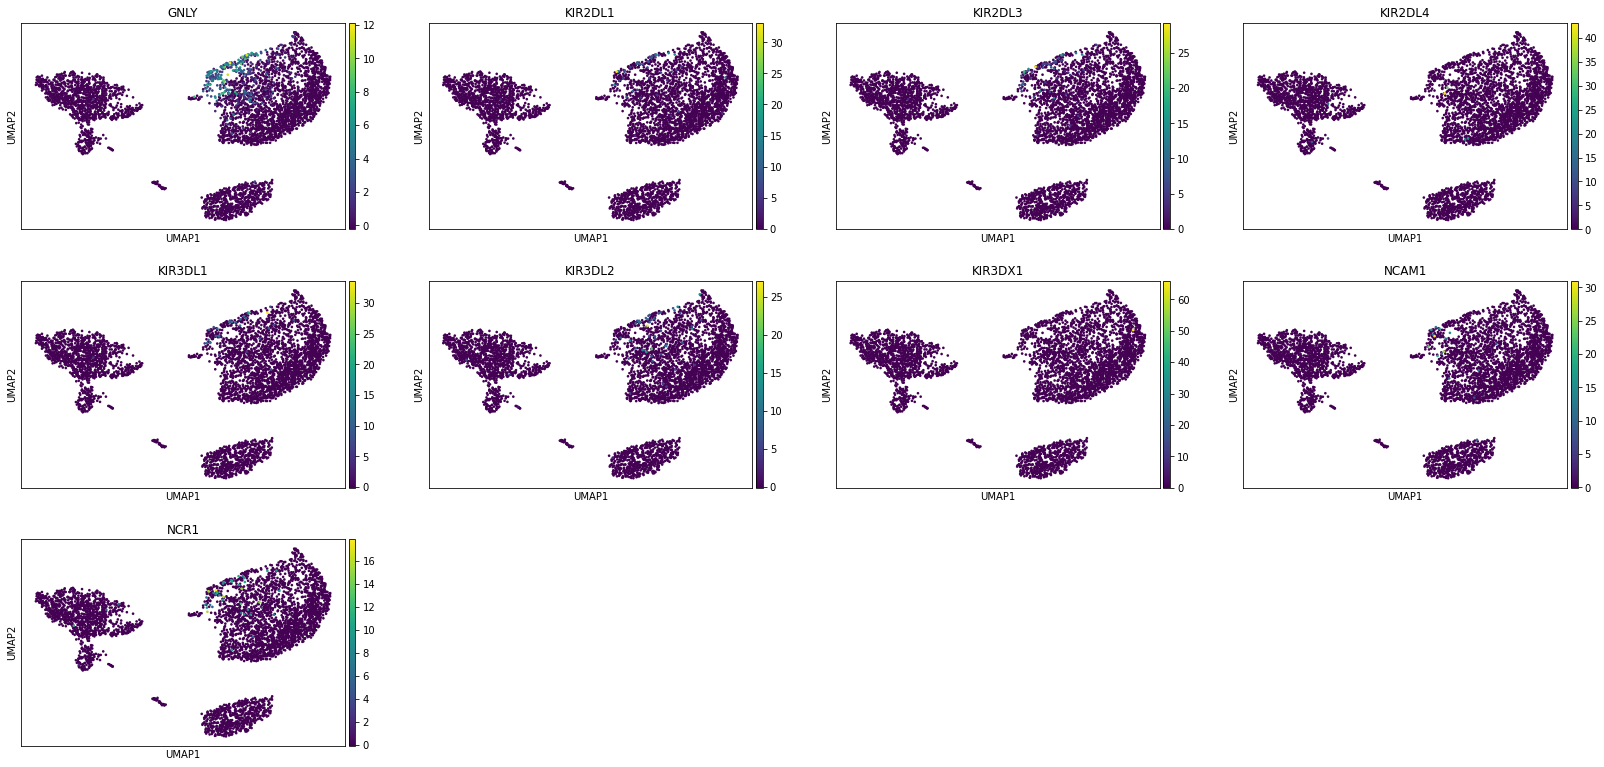

Macrophage
['CD68' 'MRC1' 'MSR1' 'NRP1' 'CD82' 'CD14' 'CD163' 'CD86' 'CD81' 'C5AR1']
Genes that are in the adata
['C5AR1' 'CD14' 'CD163' 'CD68' 'CD81' 'CD82' 'CD86' 'MRC1' 'MSR1' 'NRP1']
Macrophage


C:\Users\xumin\AppData\Local\Temp\ipykernel_5980\2433002912.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if real_genes ==[]:


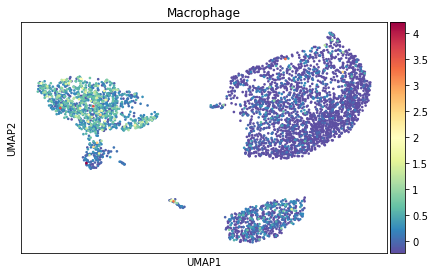

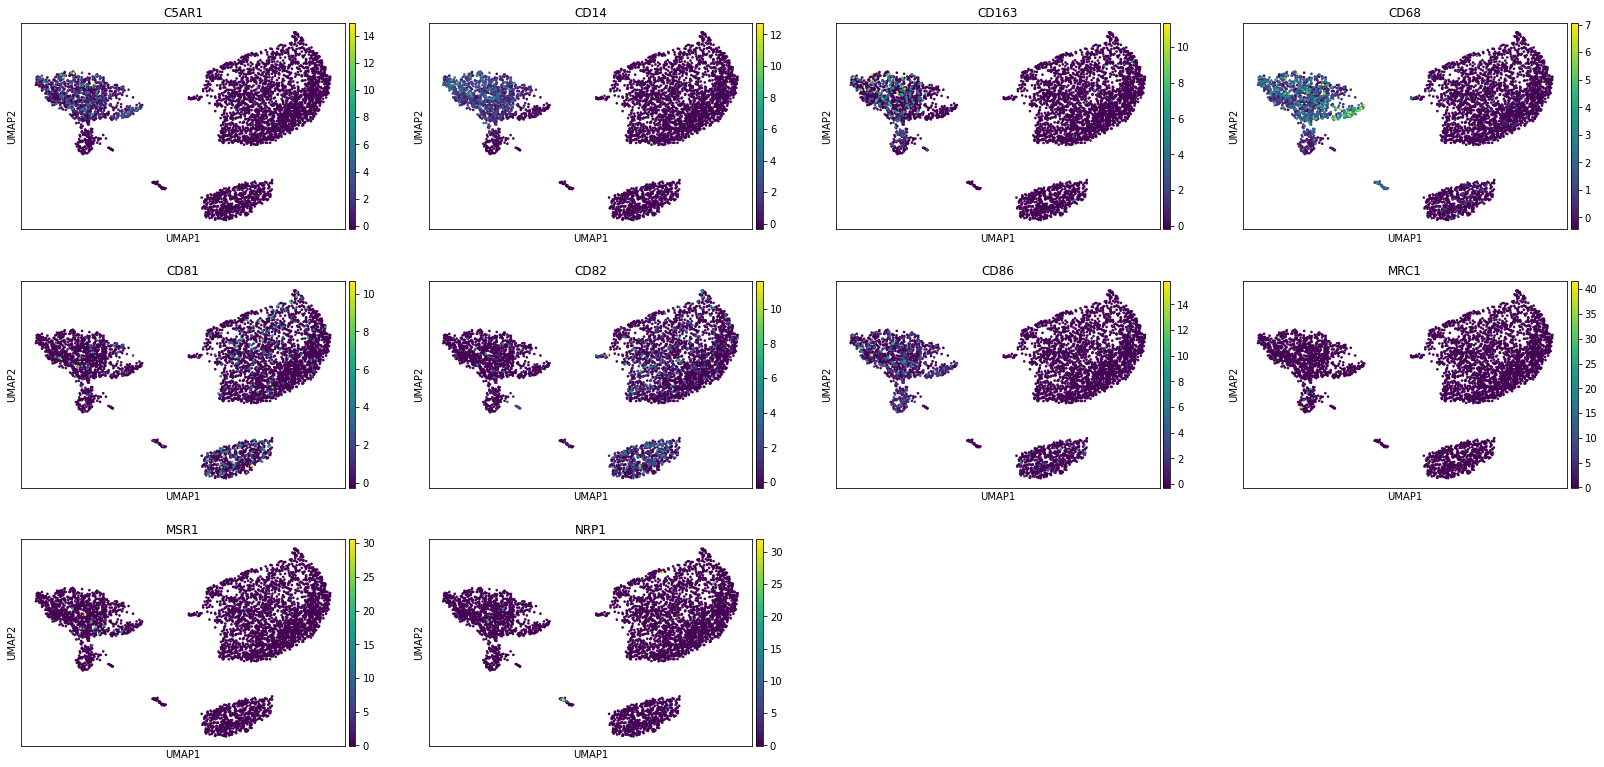

Monocyte
['CD33' 'LYZ' 'MPO' 'FCN1' 'CSF3R' 'VCAN']
Genes that are in the adata
['CD33' 'CSF3R' 'FCN1' 'LYZ' 'MPO' 'VCAN']
Monocyte


C:\Users\xumin\AppData\Local\Temp\ipykernel_5980\2433002912.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if real_genes ==[]:


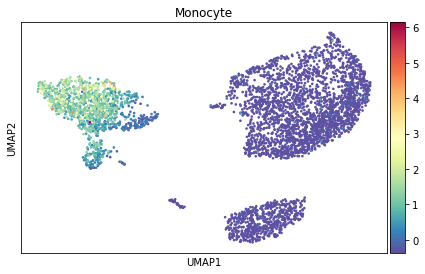

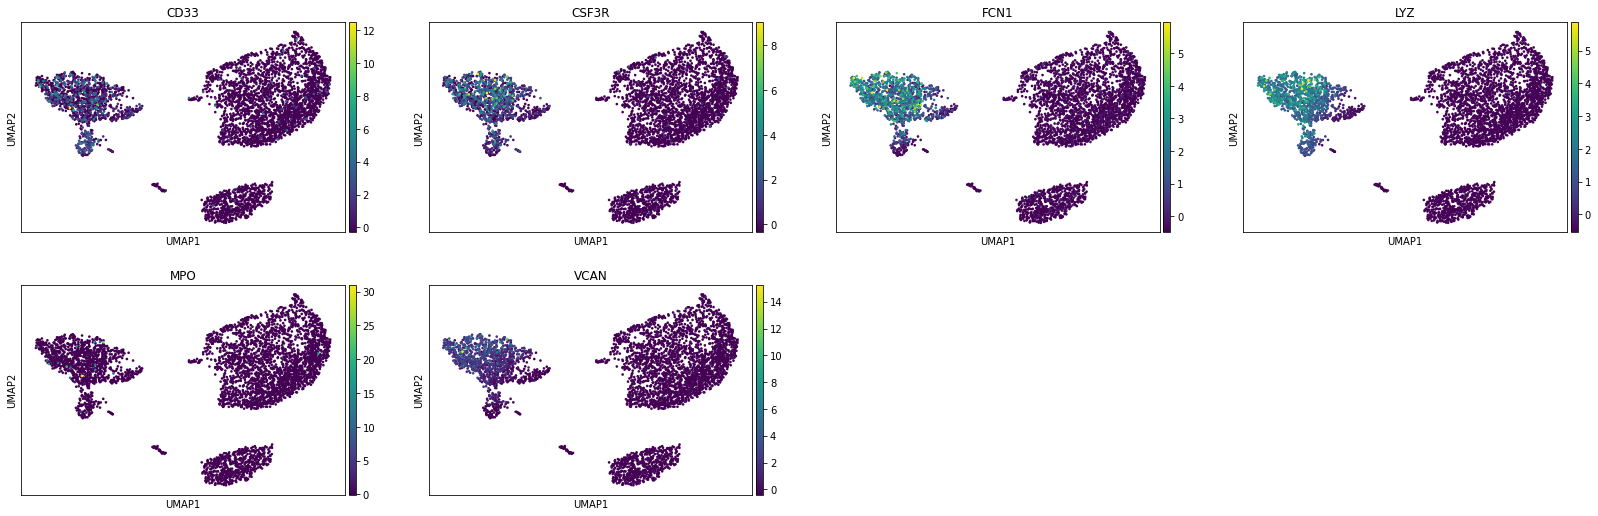

B Cells
['CD19' 'CD40LG' 'IGHD' 'EBF1' 'TCF3' 'CS1C' 'CS19' 'MS4A1' 'CR2' 'CD27'
 'CD22' 'CD79A' 'POU2F2' 'IGHG1' 'IGHM' 'CD19' 'MS4A1' 'PAX5']
Genes that are in the adata
['CD19' 'CD22' 'CD27' 'CD40LG' 'CD79A' 'CR2' 'EBF1' 'IGHD' 'IGHG1' 'IGHM'
 'MS4A1' 'PAX5' 'POU2F2' 'TCF3']
B Cells


C:\Users\xumin\AppData\Local\Temp\ipykernel_5980\2433002912.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if real_genes ==[]:


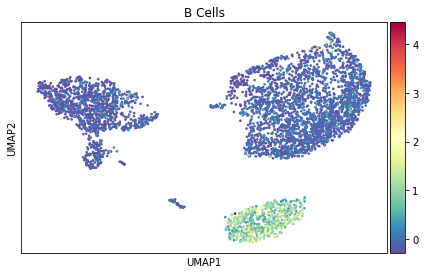

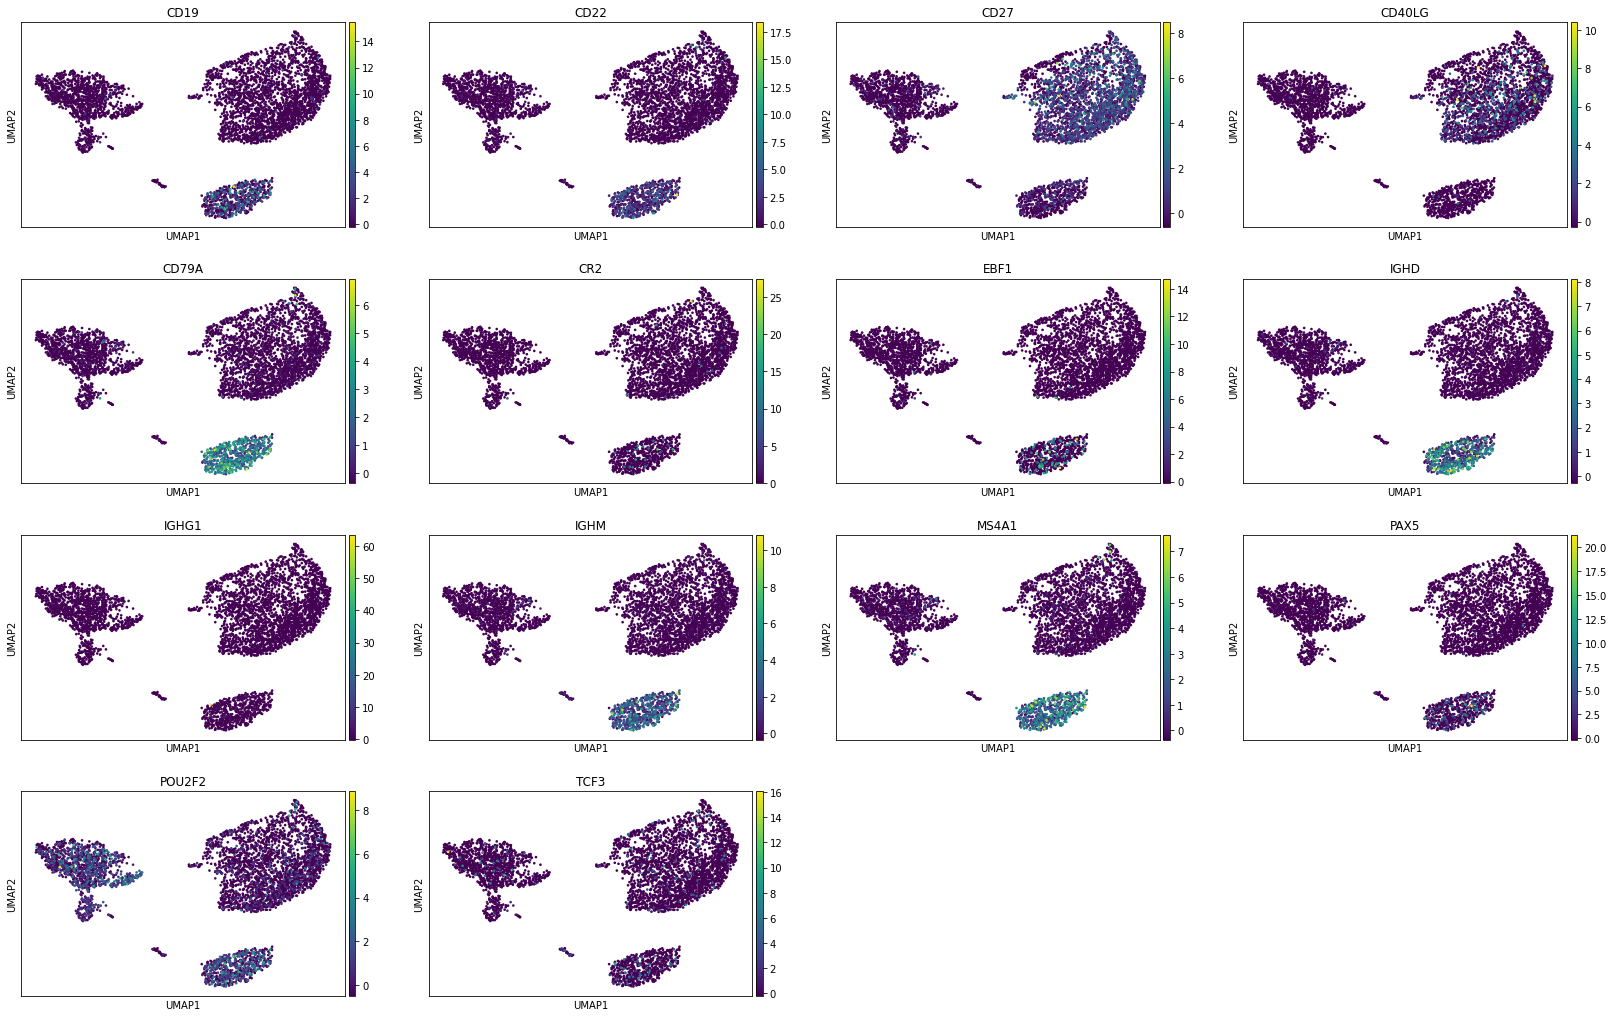

T cells
['CD3D' 'CD3E']
Genes that are in the adata
['CD3D' 'CD3E']
T cells


C:\Users\xumin\AppData\Local\Temp\ipykernel_5980\2433002912.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if real_genes ==[]:


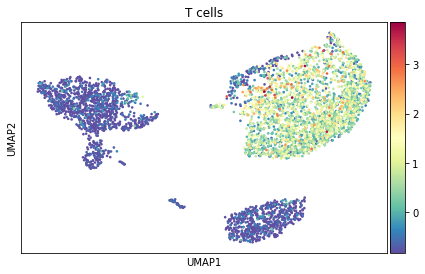

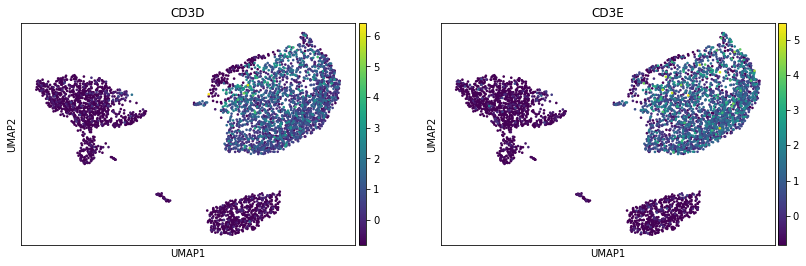

Endothelial
['PECAM1']
Genes that are in the adata
['PECAM1']
Endothelial


C:\Users\xumin\AppData\Local\Temp\ipykernel_5980\2433002912.py:12: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if real_genes ==[]:


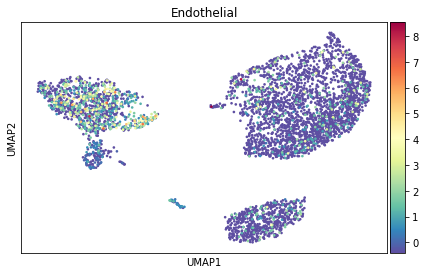

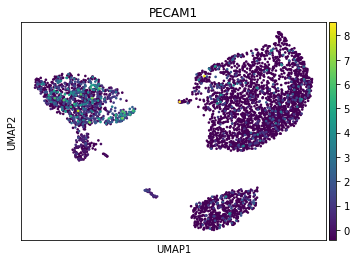

Fibroblast
['VIM' 'ACTA2' 'SERPINH1' 'S100A4']
Genes that are in the adata
['ACTA2' 'S100A4' 'SERPINH1' 'VIM']
Fibroblast


C:\Users\xumin\AppData\Local\Temp\ipykernel_5980\2433002912.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if real_genes ==[]:


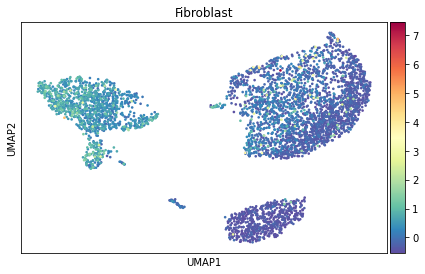

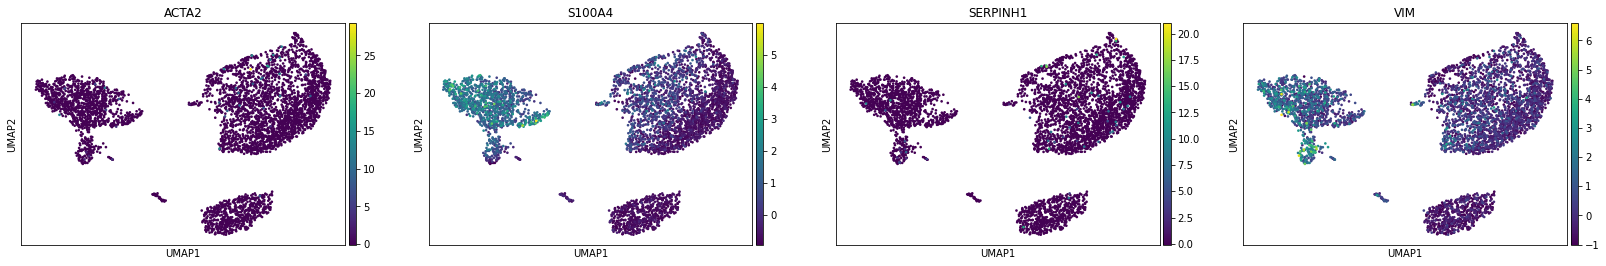

Neutrophil
['CD11B' 'CD14 low' 'CD15' 'CD16' 'CD32' 'CD33' 'CD44' 'CD45+'
 'CD66b/CEACAM-8+' 'HLA-DR-/low' 'CD49d (Integrin alpha 4)-'
 'CD18 (Integrin beta 2)+' 'CD62L+' 'MPO+']
Genes that are in the adata
['CD33' 'CD44']
Neutrophil


C:\Users\xumin\AppData\Local\Temp\ipykernel_5980\2433002912.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if real_genes ==[]:


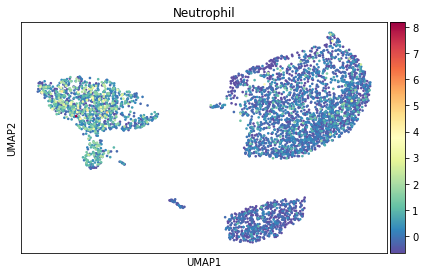

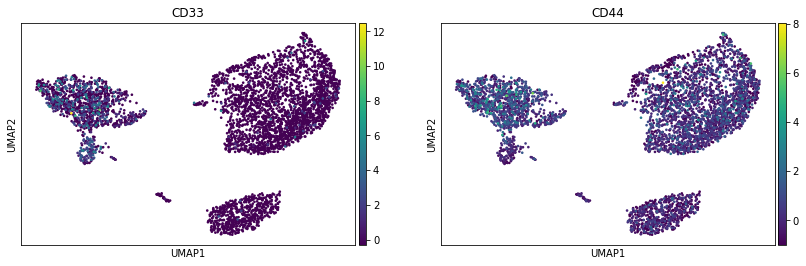

DC
['CD80' 'CD86' 'CCR7' 'CD1a' 'CD1c' 'CD11b' 'CD11c' 'CD14' 'CD16' 'CD40'
 'CD83' 'CD123' 'CD141' 'CX3CR1' 'CD209' 'EpCAM' 'HLA-DR' 'CD207' 'CD172a'
 'XCR1']
Genes that are in the adata
['CCR7' 'CD14' 'CD207' 'CD209' 'CD40' 'CD80' 'CD83' 'CD86' 'CX3CR1' 'XCR1']
DC


C:\Users\xumin\AppData\Local\Temp\ipykernel_5980\2433002912.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if real_genes ==[]:


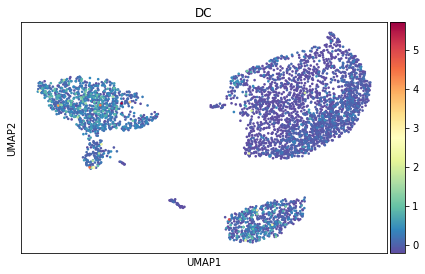

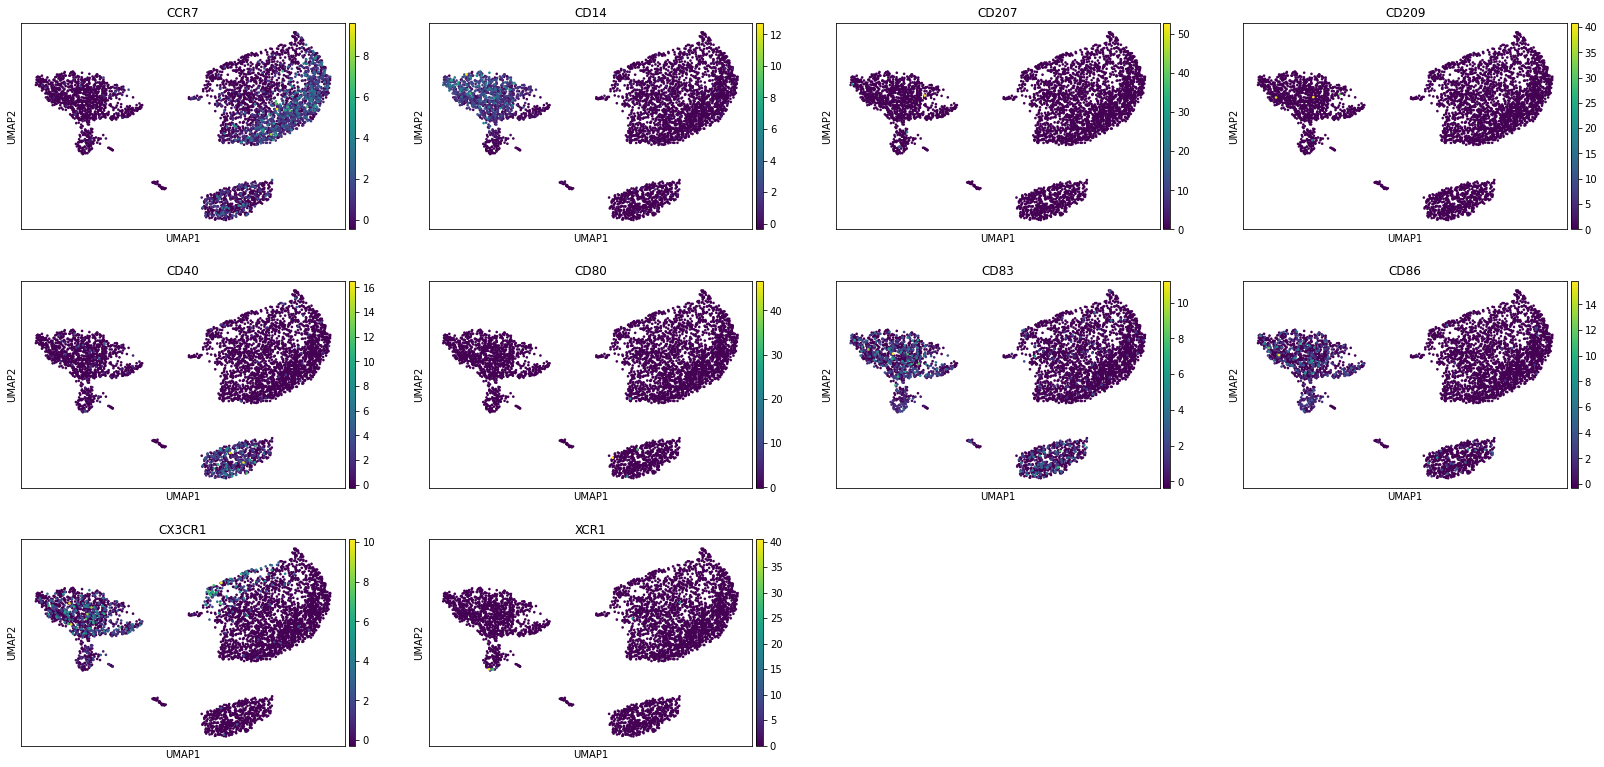

In [460]:
for c in Cell_type_interest:
    marker_genes = []
    cc = np.array(markers_df[c].values.tolist())
    marker_genes = np.append(marker_genes,[x for x in cc if str(x) != 'nan'])
    real_genes = np.intersect1d(adata.var.index, marker_genes)
    
    print (c)
    print(marker_genes)
    print("Genes that are in the adata")
    print(real_genes)
    
    if real_genes ==[]:
        continue
    
    val = np.sum(adata[:,real_genes].X,axis=1) # sum for each row across columns
    val = np.array(val).flatten()

    label = str(c)
    print(label)
    adata.obs[label] = val/len(real_genes)

    sc.pl.scatter(adata,color=label,legend_loc='none',basis='umap',color_map='Spectral_r')
    sc.pl.umap(adata, color=real_genes)


Q2d

The left cluster could be monocyte.

The right upper cluster could be T cell.

The right bottom cluster could be B cell.

# Q3

In [573]:
#regress out log10 library size
sc.pp.regress_out(adata, ['log10librarysize'])
sc.pp.scale(adata)

In [ ]:
#redo 2b-c

In [574]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

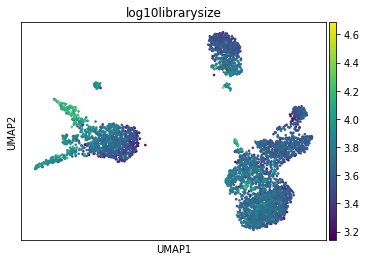

In [575]:
sc.pl.umap(adata, color = "log10librarysize")

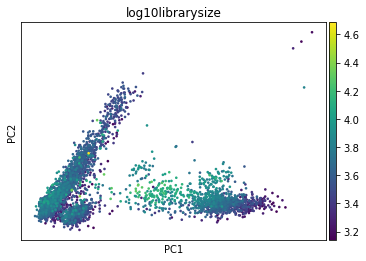

In [576]:
sc.tl.pca(adata)
sc.pl.pca_scatter(adata, color='log10librarysize')

Regularization dramatically lowers the model's variance while maintaining or even increasing its bias.

It prevents overfitting by adding a regularization term to the error function.